In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ishan\Downloads\1722506560_datasets (2)\rolling_stones_spotify.csv")
display(df.head())
display(df.tail())

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.967,39,154080
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.446,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.835,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.532,27,121680
1609,1609,Walking The Dog,The Rolling Stones,1964-04-16,12,43SkTJJ2xleDaeiE4TIM70,spotify:track:43SkTJJ2xleDaeiE4TIM70,0.3830,0.727,0.934,0.068500,0.0965,-8.373,0.0359,125.275,0.969,35,189186


In [6]:
# ---------- PCA SETUP (REUSED FROM PCA NOTEBOOK) ----------

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

numerical_features_for_pca = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
    'popularity', 'duration_ms'
]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features_for_pca])

scaled_df = pd.DataFrame(
    scaled_features,
    columns=numerical_features_for_pca
)

# Apply PCA (same as your PCA notebook)
pca_final = PCA(n_components=8, random_state=42)
pca_components = pca_final.fit_transform(scaled_df)

pca_components_df = pd.DataFrame(
    pca_components,
    columns=[f'PC{i+1}' for i in range(pca_components.shape[1])]
)

print("PCA components shape:", pca_components_df.shape)


PCA components shape: (1610, 8)


## Cohort Analysis for Songs

Objective:
To analyze song cohorts based on popularity levels and understand
how different groups of songs differ in their audio characteristics.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Cohort Definition

Songs are grouped into cohorts based on popularity score ranges.
This acts as a proxy for audience engagement.


In [3]:
bins = [0, 30, 60, 100]
labels = ['Low Popularity', 'Medium Popularity', 'High Popularity']

df['popularity_cohort'] = pd.cut(df['popularity'], bins=bins, labels=labels)


In [4]:
df['popularity_cohort'].value_counts()


popularity_cohort
Low Popularity       1302
Medium Popularity     275
High Popularity        16
Name: count, dtype: int64

This shows the distribution of songs across different popularity cohorts.


In [7]:
cohort_summary = df.groupby('popularity_cohort')[numerical_features_for_pca].mean()
cohort_summary


C:\Users\ishan\AppData\Local\Temp\ipykernel_26180\2368380230.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_summary = df.groupby('popularity_cohort')[numerical_features_for_pca].mean()


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
popularity_cohort,,,,,,,,,,,
Low Popularity,0.238796,0.455991,0.803012,0.159461,0.536244,-6.974455,0.073330,127.149114,0.572709,16.698925,260691.905530
Medium Popularity,0.301825,0.518807,0.746582,0.186951,0.304665,-6.800164,0.052835,122.092909,0.621163,38.610909,247599.621818
High Popularity,0.386629,0.597938,0.714313,0.062850,0.168319,-6.970313,0.050125,122.062688,0.660250,69.312500,280223.812500


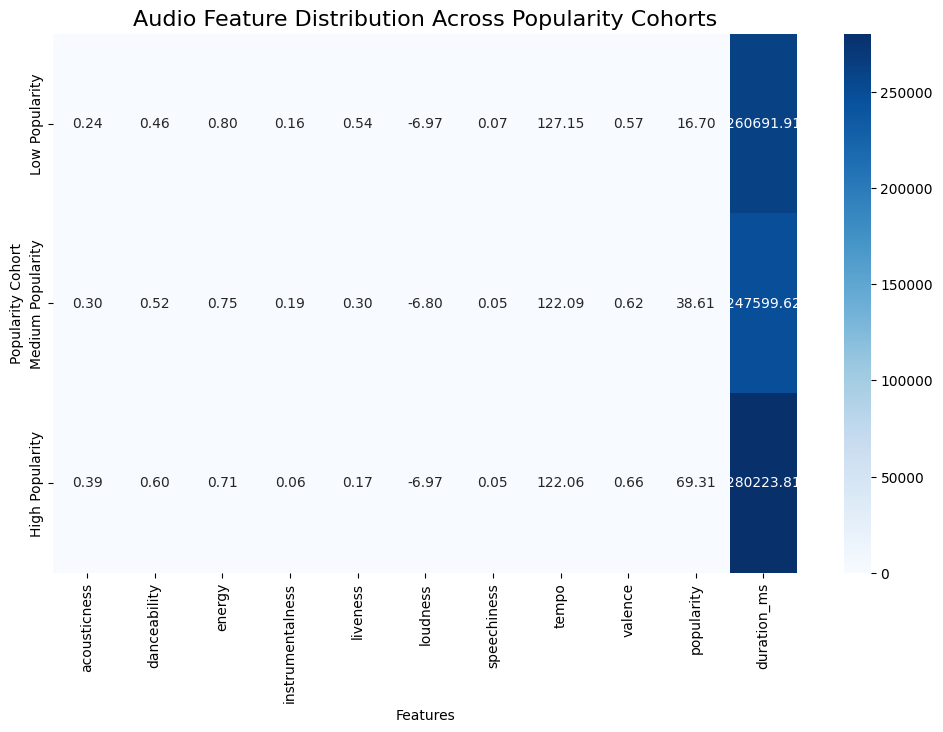

In [8]:
plt.figure(figsize=(12, 7))
sns.heatmap(cohort_summary, annot=True, fmt=".2f", cmap="Blues")
plt.title("Audio Feature Distribution Across Popularity Cohorts", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Popularity Cohort")
plt.show()


### Insights from Cohort Analysis

- High popularity songs generally exhibit higher energy, danceability, and valence
- Low popularity songs tend to have lower tempo and energy
- Medium popularity songs form a balanced cohort

These insights help Spotify understand which audio features contribute
to higher engagement and improve recommendation strategies.
